In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
data= pd.read_csv('../data/Crimes_-_2001_to_Present.csv')
data.head()

/tmp/ipykernel_22031/1485098657.py:1: DtypeWarning: Columns (0,8,9,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('../data/Crimes_-_2001_to_Present.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
#converting into date format
data['Date']=pd.to_datetime(data['Date'])
data.index= pd.DatetimeIndex(data.Date)
data.index = pd.to_datetime(data.index)

In [4]:
#converting object into categorical data
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

### Number of Crimes Over The Years


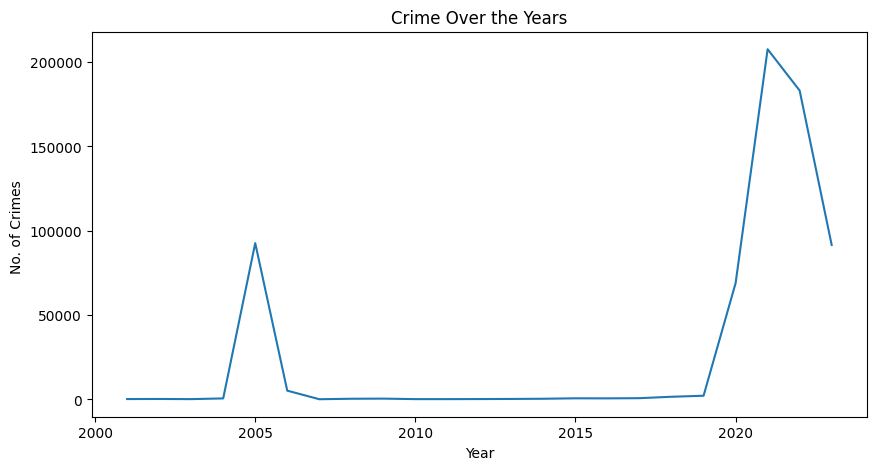

In [6]:
plt.figure(figsize = (10,5))
data.groupby([data.index.year]).size().plot.line()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Crimes ')
plt.show()

### Number of Crimes Over Months


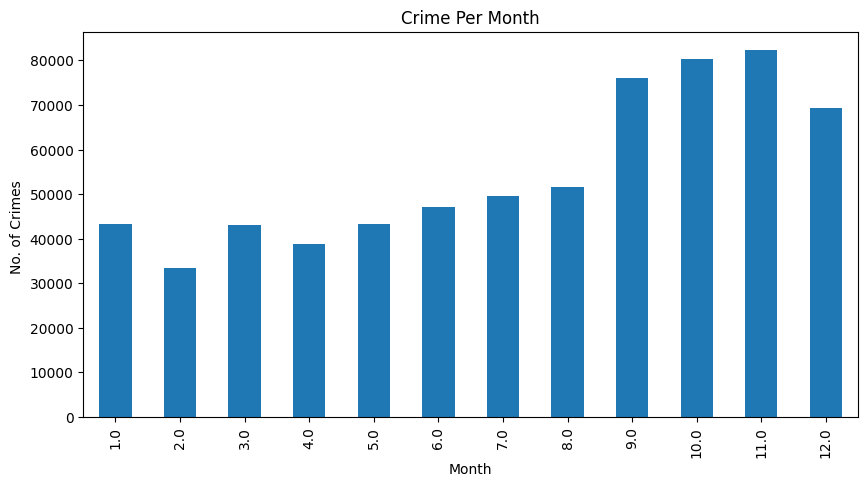

In [7]:
plt.figure(figsize = (10,5))
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Crimes ')
plt.show()

### Number of Crimes Per Day of Month


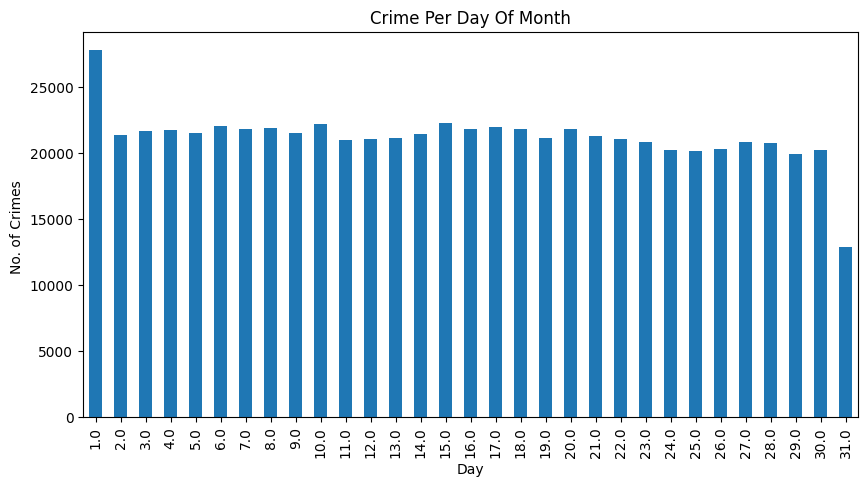

In [8]:
plt.figure(figsize = (10,5))
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

### Number of Crimes Per Hour


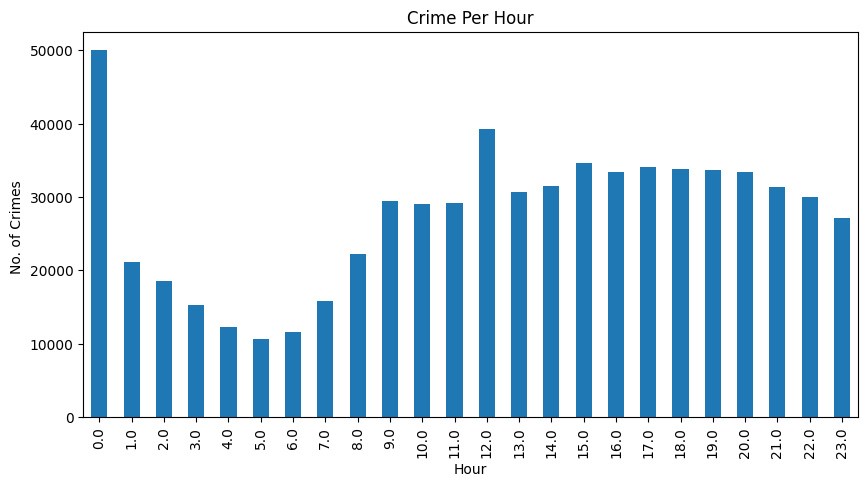

In [9]:
plt.figure(figsize = (10,5))
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes ')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658110 entries, 2015-03-18 12:00:00 to NaT
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    658110 non-null  object        
 1   Case Number           658106 non-null  object        
 2   Date                  658106 non-null  datetime64[ns]
 3   Block                 658106 non-null  object        
 4   IUCR                  658106 non-null  object        
 5   Primary Type          658106 non-null  category      
 6   Description           658106 non-null  category      
 7   Location Description  654068 non-null  category      
 8   Arrest                658106 non-null  object        
 9   Domestic              658106 non-null  object        
 10  Beat                  658106 non-null  float64       
 11  District              658105 non-null  float64       
 12  Ward                  657913 non-null  f

### Plot Count Function


In [12]:
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index

    plt.figure(figsize=(10, 6))
    plt.bar(df["Type"], df["Freq"], color='skyblue')
    plt.xlabel('Type')
    plt.ylabel('Frequency')
    plt.title(title)
    
    for i, freq in enumerate(df["Freq"]):
        plt.text(i, freq, str(freq), ha='center', va='bottom')

    plt.show()

### Frequency by Primary Type


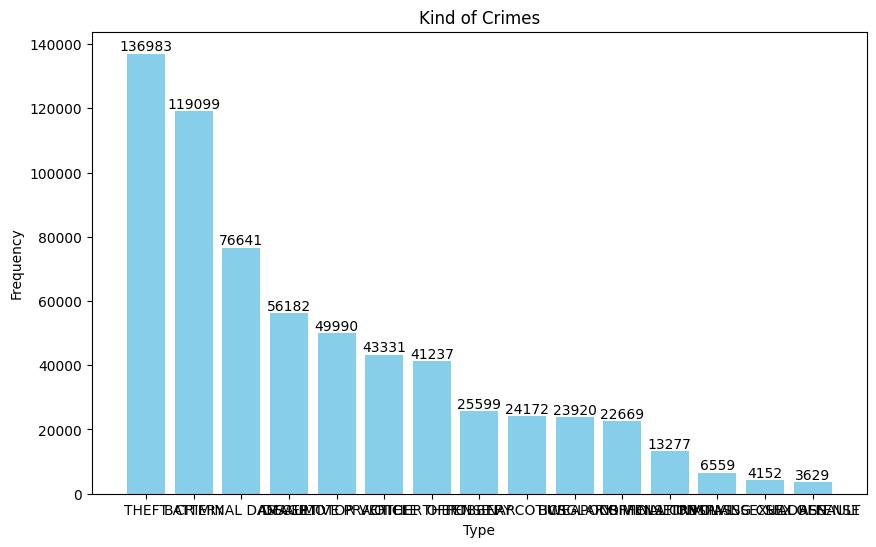

In [13]:
plot_counts(data["Primary Type"], "Kind of Crimes")

### Frequency by Location


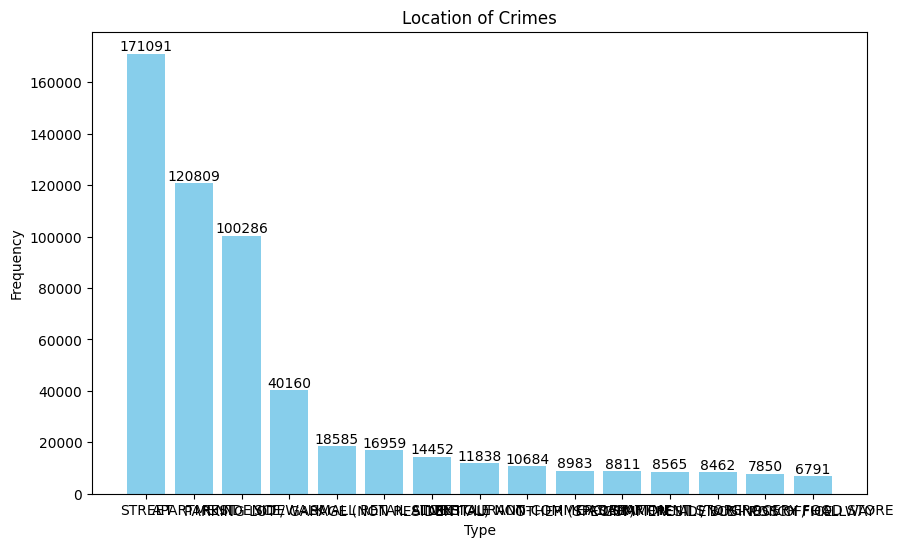

In [14]:
plot_counts(data["Location Description"], "Location of Crimes")

### Frequency by Description of Crimes


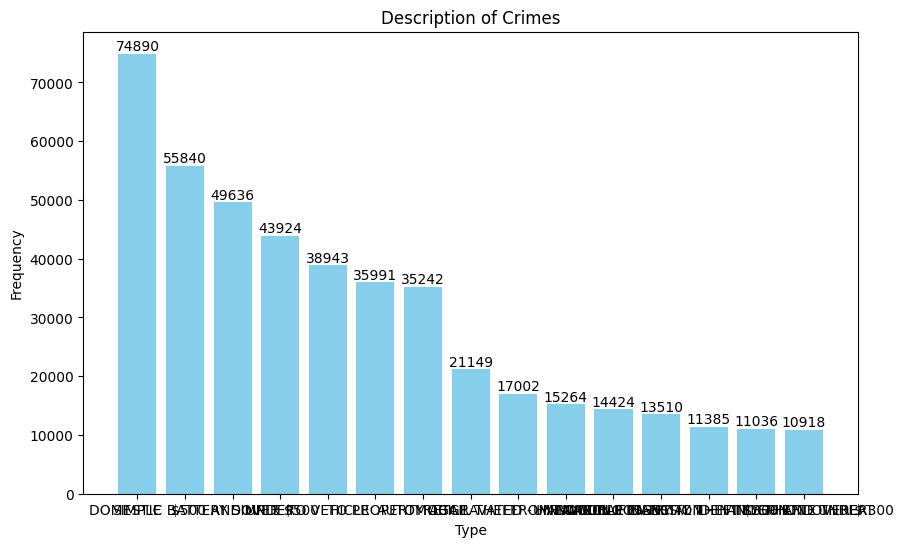

In [15]:
plot_counts(data["Description"], "Description of Crimes")

### Chances of someone getting arrested crimewise


/tmp/ipykernel_22031/1661246010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux = data.groupby('Primary Type')['Arrest'].mean().reset_index()


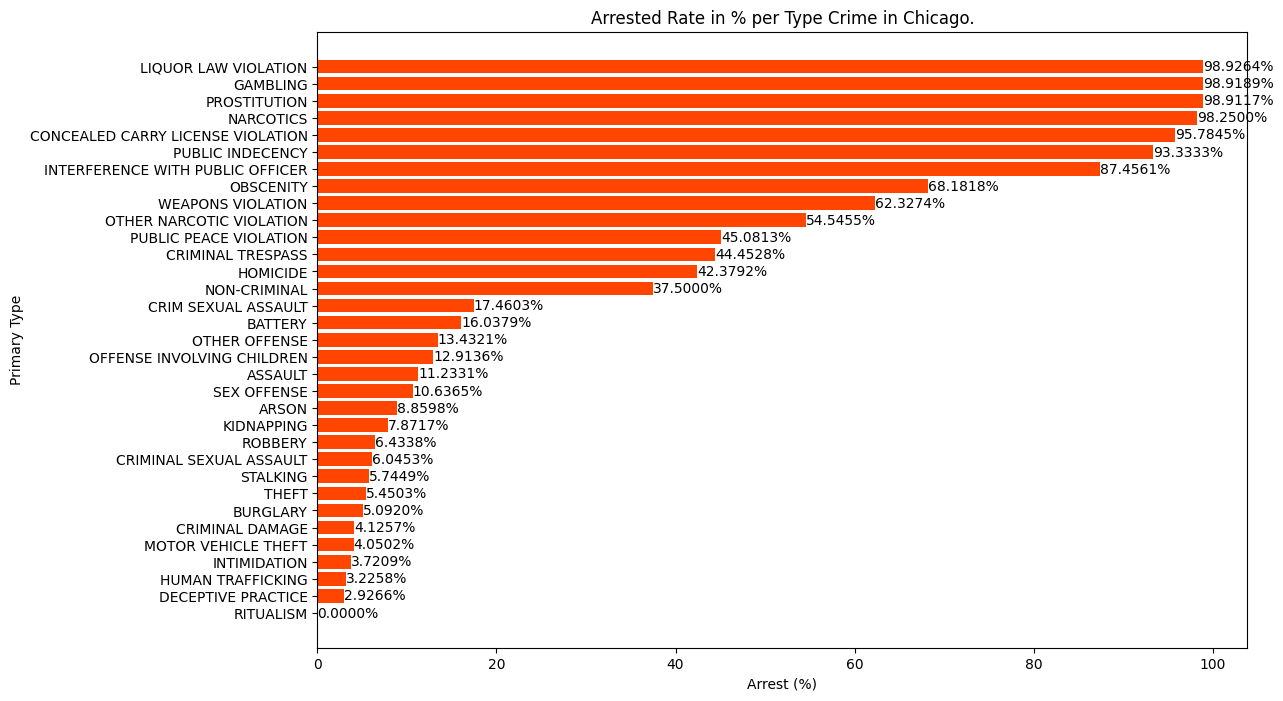

In [16]:
aux = data.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest'] = pd.to_numeric(aux['Arrest'])  # Convert to numeric if not already
aux['Arrest (%)'] = (aux['Arrest'] * 100).round(4)
aux.sort_values('Arrest', inplace=True)

plt.figure(figsize=(12, 8))
bars = plt.barh(aux['Primary Type'], aux['Arrest (%)'], color='orangered')

plt.xlabel('Arrest (%)')
plt.ylabel('Primary Type')
plt.title('Arrested Rate in % per Type Crime in Chicago.')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{bar.get_width():.4f}%", 
             va='center', ha='left', color='black')

plt.show()